<a href="https://colab.research.google.com/github/RubenMcCarty/Data_AI_Architect/blob/main/DiagramAsCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Instalamos la librería Diagrams
# Fuente: https://diagrams.mingrammer.com/
!pip install diagrams

In [26]:
# Importamos el módulo maestro Diagram
from diagrams import Diagram

# Vendor AWS
from diagrams.aws.compute import EC2
# Vendor Azure
from diagrams.azure.storage import BlobStorage
# Vendor Google
from diagrams.gcp.analytics import BigQuery

 Diagrama Hola Mundo' size too small for label
 Diagrama Hola Mundo' size too small for label


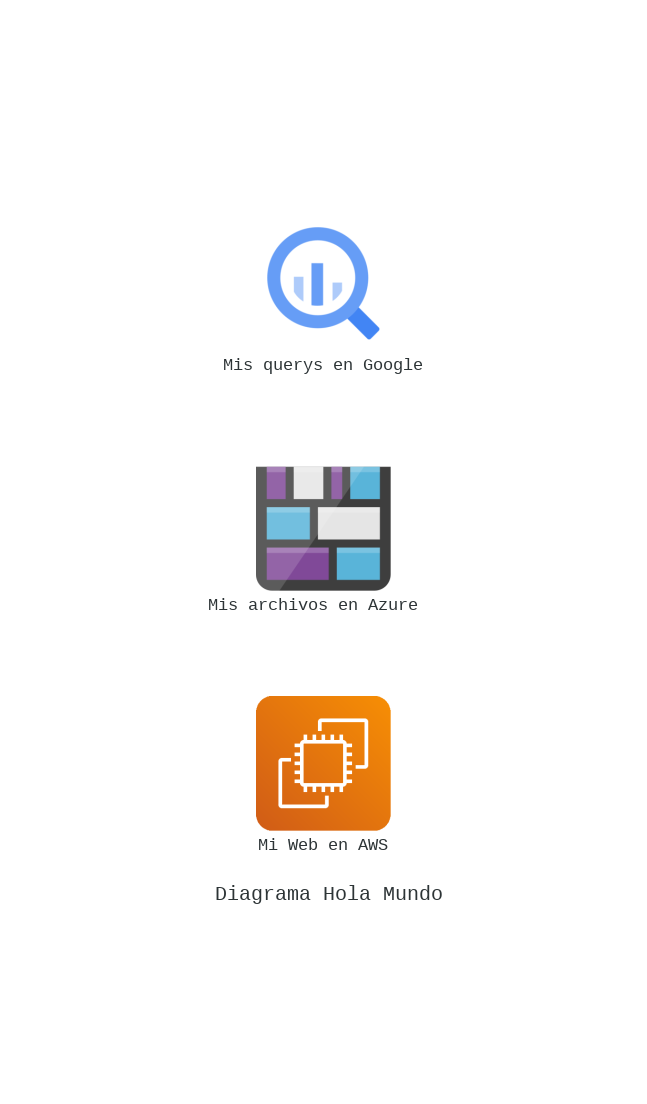

In [27]:
# Diagramando
with Diagram("\n Diagrama Hola Mundo") as miDiagrama:
  EC2("Mi Web en AWS")
  BlobStorage("Mis archivos en Azure  ")
  BigQuery("Mis querys en Google")
miDiagrama

 Diagrama Hola Mundo' size too small for label
 Diagrama Hola Mundo' size too small for label


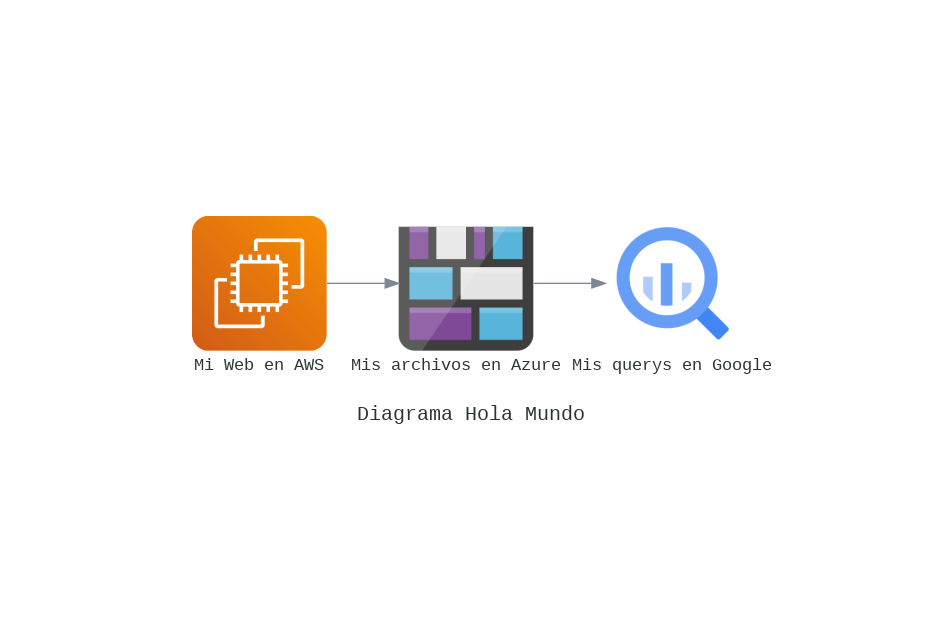

In [16]:
# Diagramando
with Diagram("\n Diagrama Hola Mundo") as miDiagrama:
  source = EC2("Mi Web en AWS")
  storage = BlobStorage("Mis archivos en Azure  ")
  query = BigQuery("Mis querys en Google")
  source >> storage >> query
miDiagrama

 Arquitectura de Datos con Azure' size too small for label


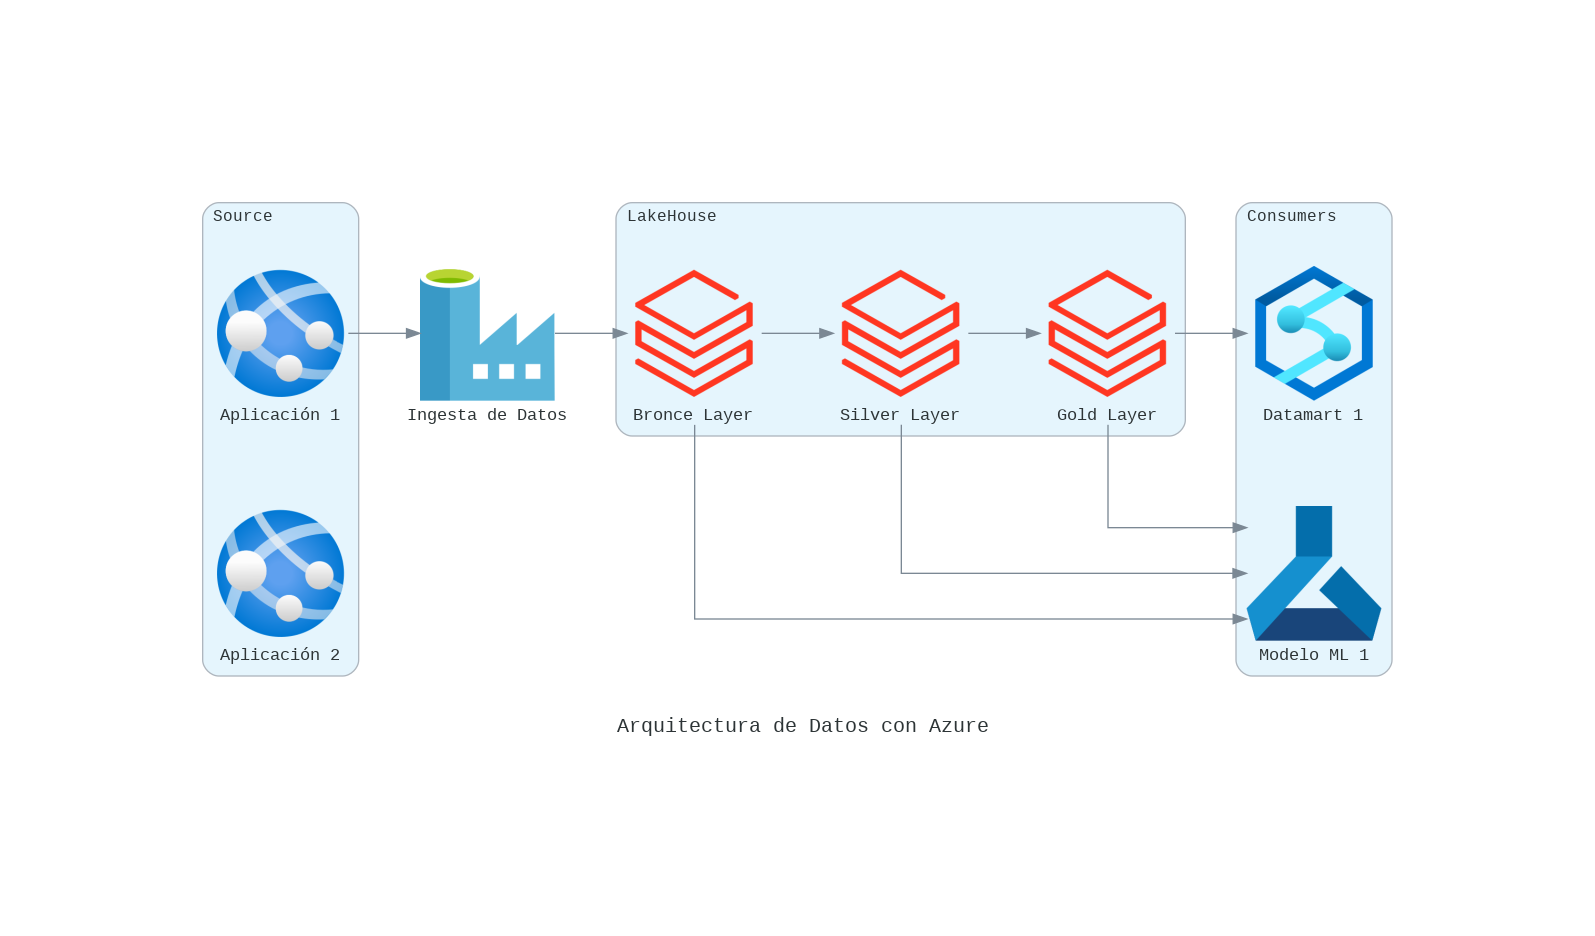

In [17]:
# Importamos los recursos del Cloud Azure
# Fuente: https://diagrams.mingrammer.com/docs/nodes/azure

from diagrams import Diagram, Cluster
from diagrams.azure.compute import AppServices
from diagrams.azure.compute import FunctionApps
from diagrams.azure.storage import BlobStorage
from diagrams.azure.analytics import AnalysisServices
from diagrams.azure.analytics import Databricks
from diagrams.azure.analytics import DataFactories
from diagrams.azure.analytics import SynapseAnalytics
from diagrams.azure.ml import MachineLearningServiceWorkspaces

with Diagram("\n Arquitectura de Datos con Azure") as diag:
  with Cluster("Source"):
    app = AppServices("Aplicación 1")
    AppServices("Aplicación 2")

  ETL = DataFactories ("Ingesta de Datos")
  with Cluster("LakeHouse"):
    bronceLayer = Databricks("Bronce Layer")
    silverLayer = Databricks("Silver Layer")
    goldLayer = Databricks("Gold Layer")

    bronceLayer >> silverLayer >> goldLayer


  with Cluster ("Consumers"):
    dataMart = SynapseAnalytics("Datamart 1")
    ML = MachineLearningServiceWorkspaces("Modelo ML 1")
    consumers = [dataMart, ML]

  app >> ETL >> bronceLayer
  goldLayer >> dataMart
  bronceLayer >> ML
  silverLayer >> ML
  goldLayer >> ML


diag

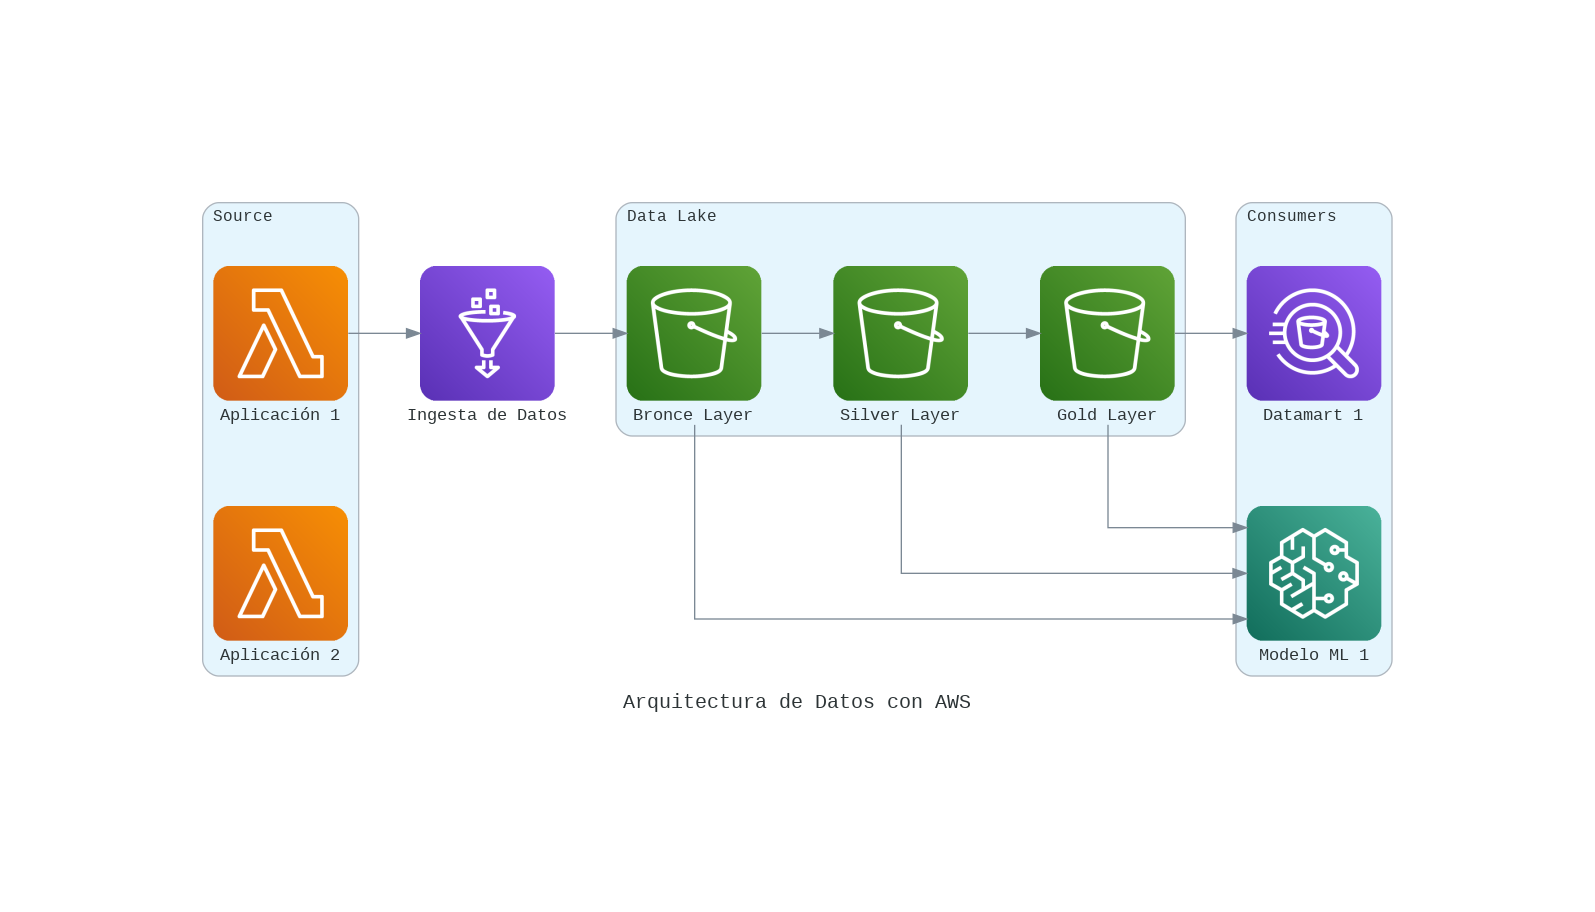

In [18]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import Lambda
from diagrams.aws.storage import S3
from diagrams.aws.analytics import Glue, Athena, EMR
from diagrams.aws.ml import Sagemaker

with Diagram("Arquitectura de Datos con AWS") as diag:
    with Cluster("Source"):
        app1 = Lambda("Aplicación 1")
        app2 = Lambda("Aplicación 2")

    ETL = Glue("Ingesta de Datos")
    with Cluster("Data Lake"):
        bronzeLayer = S3("Bronce Layer")
        silverLayer = S3("Silver Layer")
        goldLayer = S3("Gold Layer")

        bronzeLayer >> silverLayer >> goldLayer

    with Cluster("Consumers"):
        dataMart1 = Athena("Datamart 1")
        mlModel1 = Sagemaker("Modelo ML 1")
        consumers = [dataMart1, mlModel1]

    app1 >> ETL >> bronzeLayer
    goldLayer >> dataMart1
    bronzeLayer >> mlModel1
    silverLayer >> mlModel1
    goldLayer >> mlModel1

diag


In [19]:
from diagrams import Diagram, Cluster
from diagrams.gcp.compute import AppEngine, CloudFunctions
from diagrams.gcp.storage import CloudStorage
from diagrams.gcp.analytics import Dataflow, BigQuery, Dataprep
from diagrams.gcp.ml import AIPlatform

with Diagram("Arquitectura de Datos con GCP") as diag:
    with Cluster("Source"):
        app1 = AppEngine("Aplicación 1")
        app2 = AppEngine("Aplicación 2")

    ETL = Dataflow("Ingesta de Datos")
    with Cluster("LakeHouse"):
        bronceLayer = CloudStorage("Bronce Layer")
        silverLayer = CloudStorage("Silver Layer")
        goldLayer = CloudStorage("Gold Layer")

        bronceLayer >> silverLayer >> goldLayer

    with Cluster("Consumers"):
        dataMart1 = BigQuery("Datamart 1")
        mlModel1 = AIPlatform("Modelo ML 1")
        consumers = [dataMart1, mlModel1]

    app1 >> ETL >> bronceLayer
    goldLayer >> dataMart1
    bronceLayer >> mlModel1
    silverLayer >> mlModel1
    goldLayer >> mlModel1

diag


ImportError: ignored

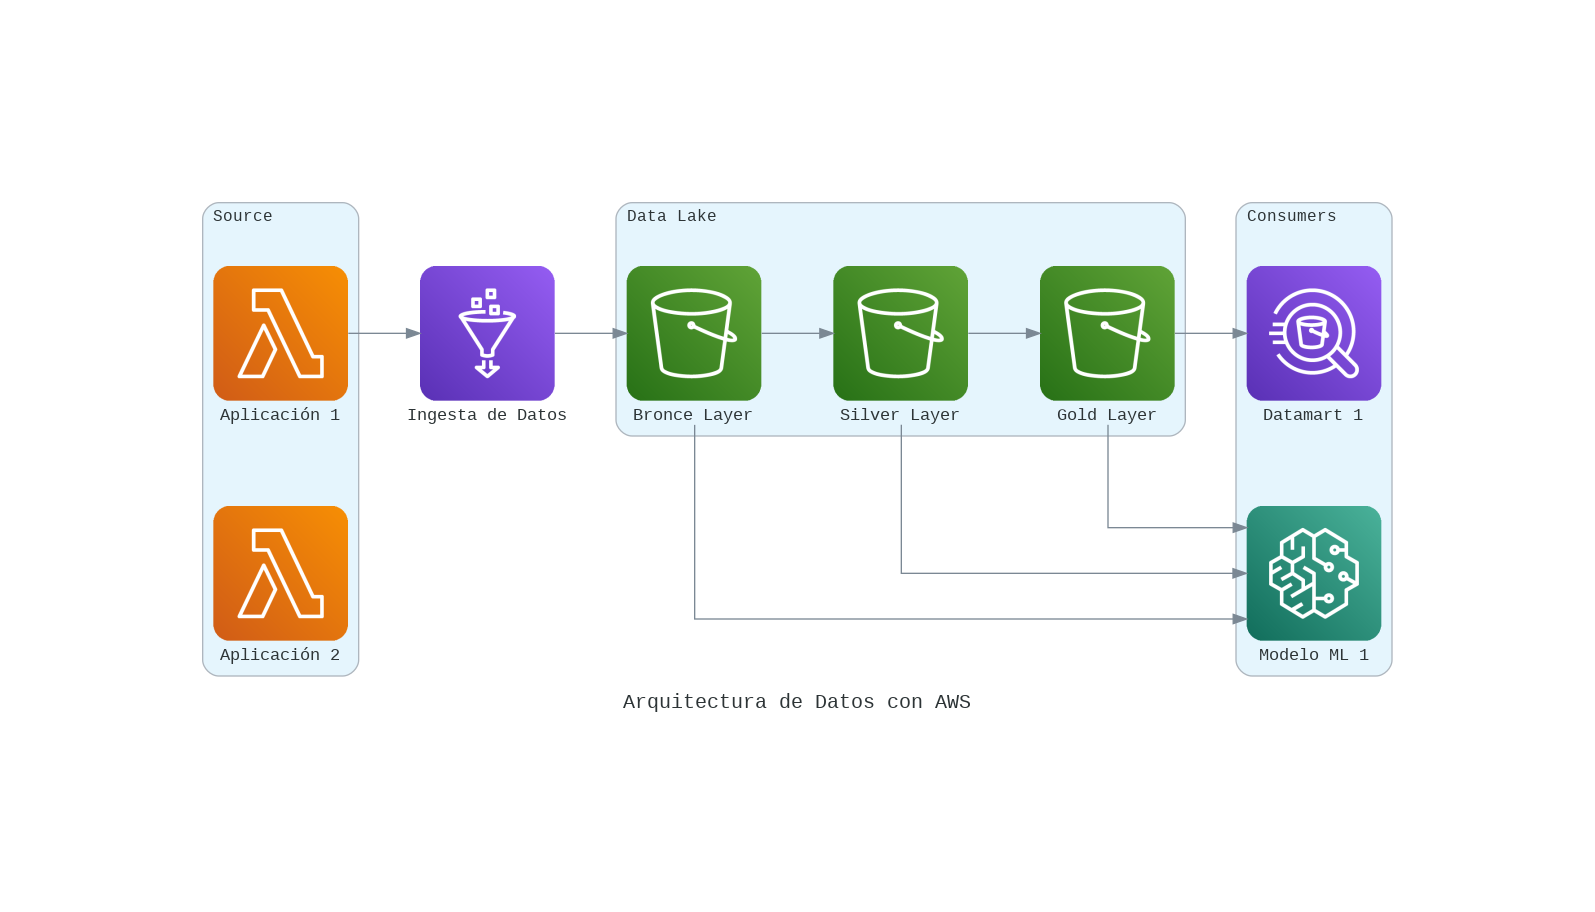

In [20]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

with Diagram("Grouped Workers", show=False, direction="TB"):
    ELB("lb") >> [EC2("worker1"),
                  EC2("worker2"),
                  EC2("worker3"),
                  EC2("worker4"),
                  EC2("worker5")] >> RDS("events")

diag

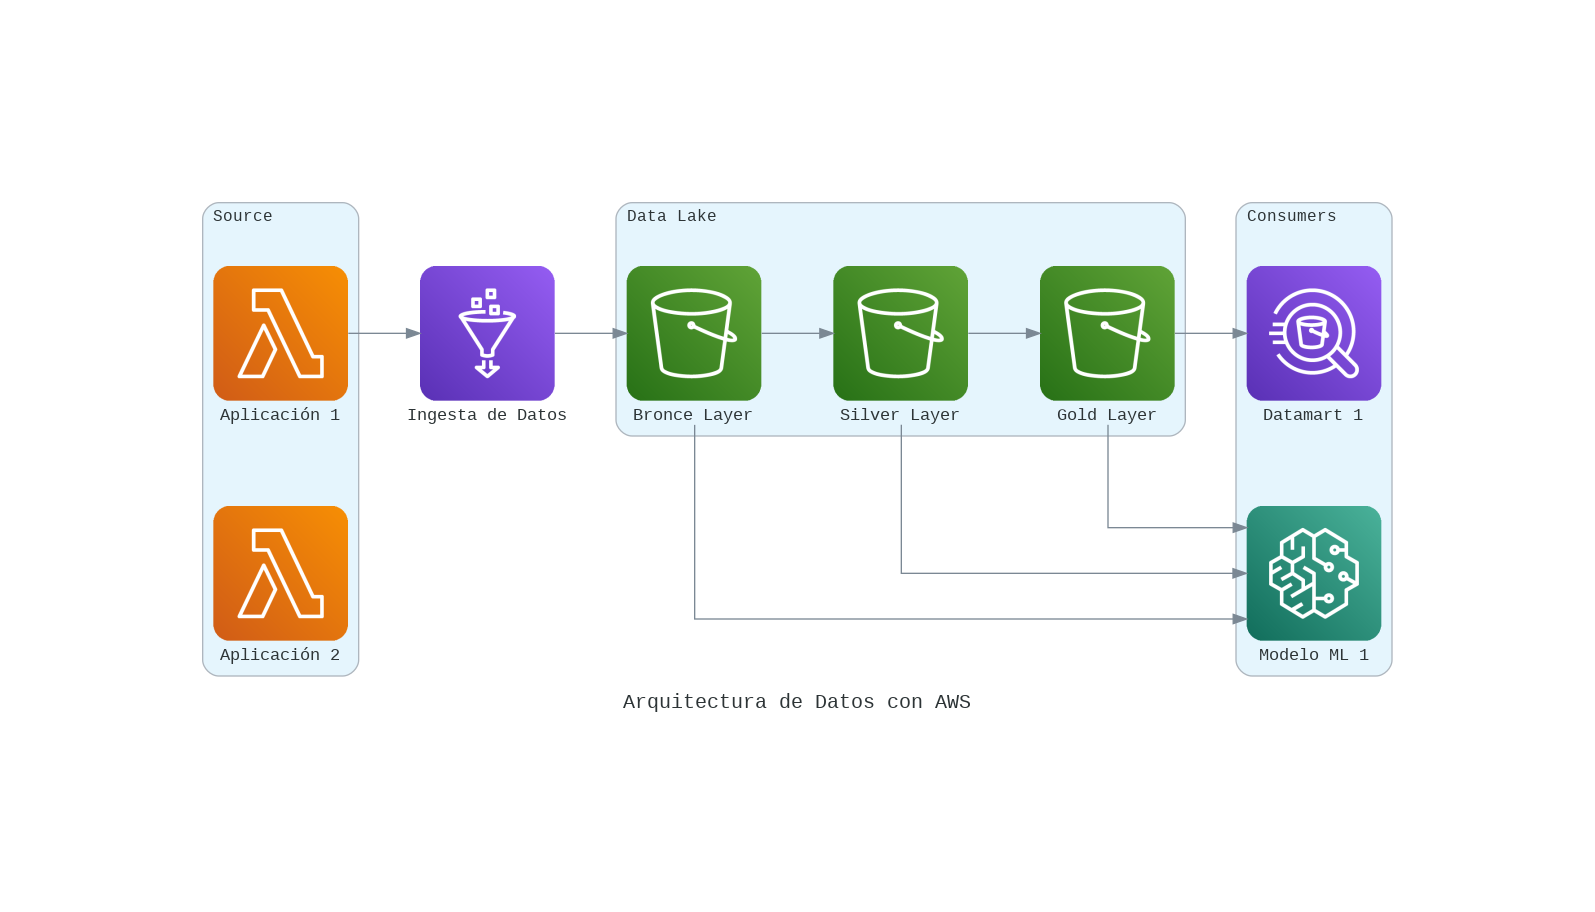

In [21]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS
from diagrams.aws.database import ElastiCache, RDS
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53

with Diagram("Clustered Web Services", show=False):
    dns = Route53("dns")
    lb = ELB("lb")

    with Cluster("Services"):
        svc_group = [ECS("web1"),
                     ECS("web2"),
                     ECS("web3")]

    with Cluster("DB Cluster"):
        db_primary = RDS("userdb")
        db_primary - [RDS("userdb ro")]

    memcached = ElastiCache("memcached")

    dns >> lb >> svc_group
    svc_group >> db_primary
    svc_group >> memcached

diag

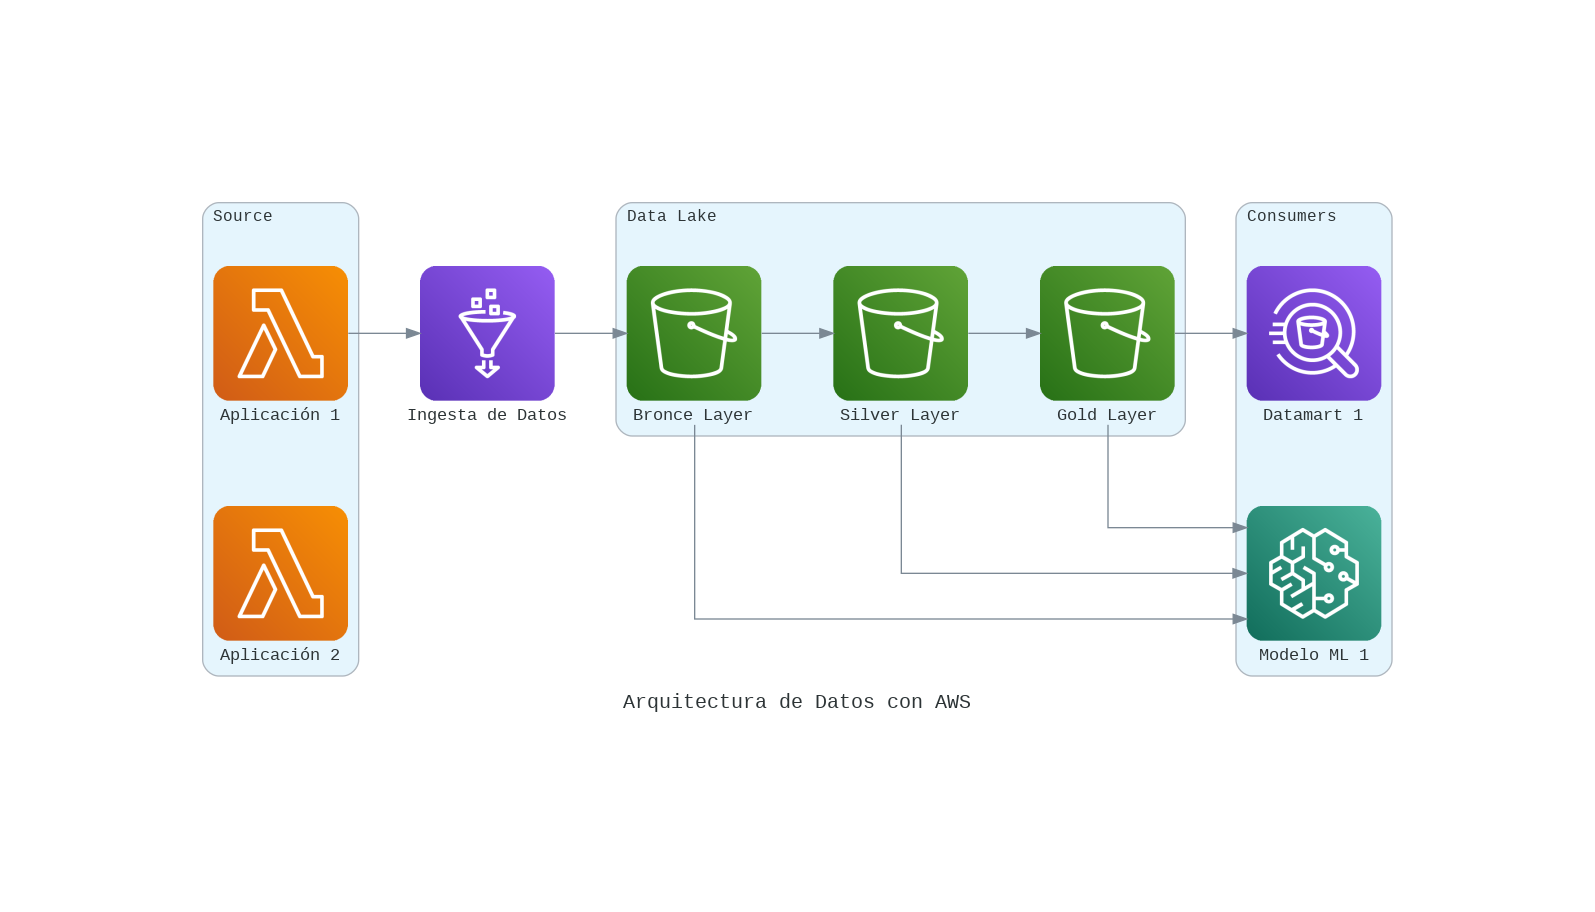

In [22]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, EKS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

with Diagram("Event Processing", show=False):
    source = EKS("k8s source")

    with Cluster("Event Flows"):
        with Cluster("Event Workers"):
            workers = [ECS("worker1"),
                       ECS("worker2"),
                       ECS("worker3")]

        queue = SQS("event queue")

        with Cluster("Processing"):
            handlers = [Lambda("proc1"),
                        Lambda("proc2"),
                        Lambda("proc3")]

    store = S3("events store")
    dw = Redshift("analytics")

    source >> workers >> queue >> handlers
    handlers >> store
    handlers >> dw

diag

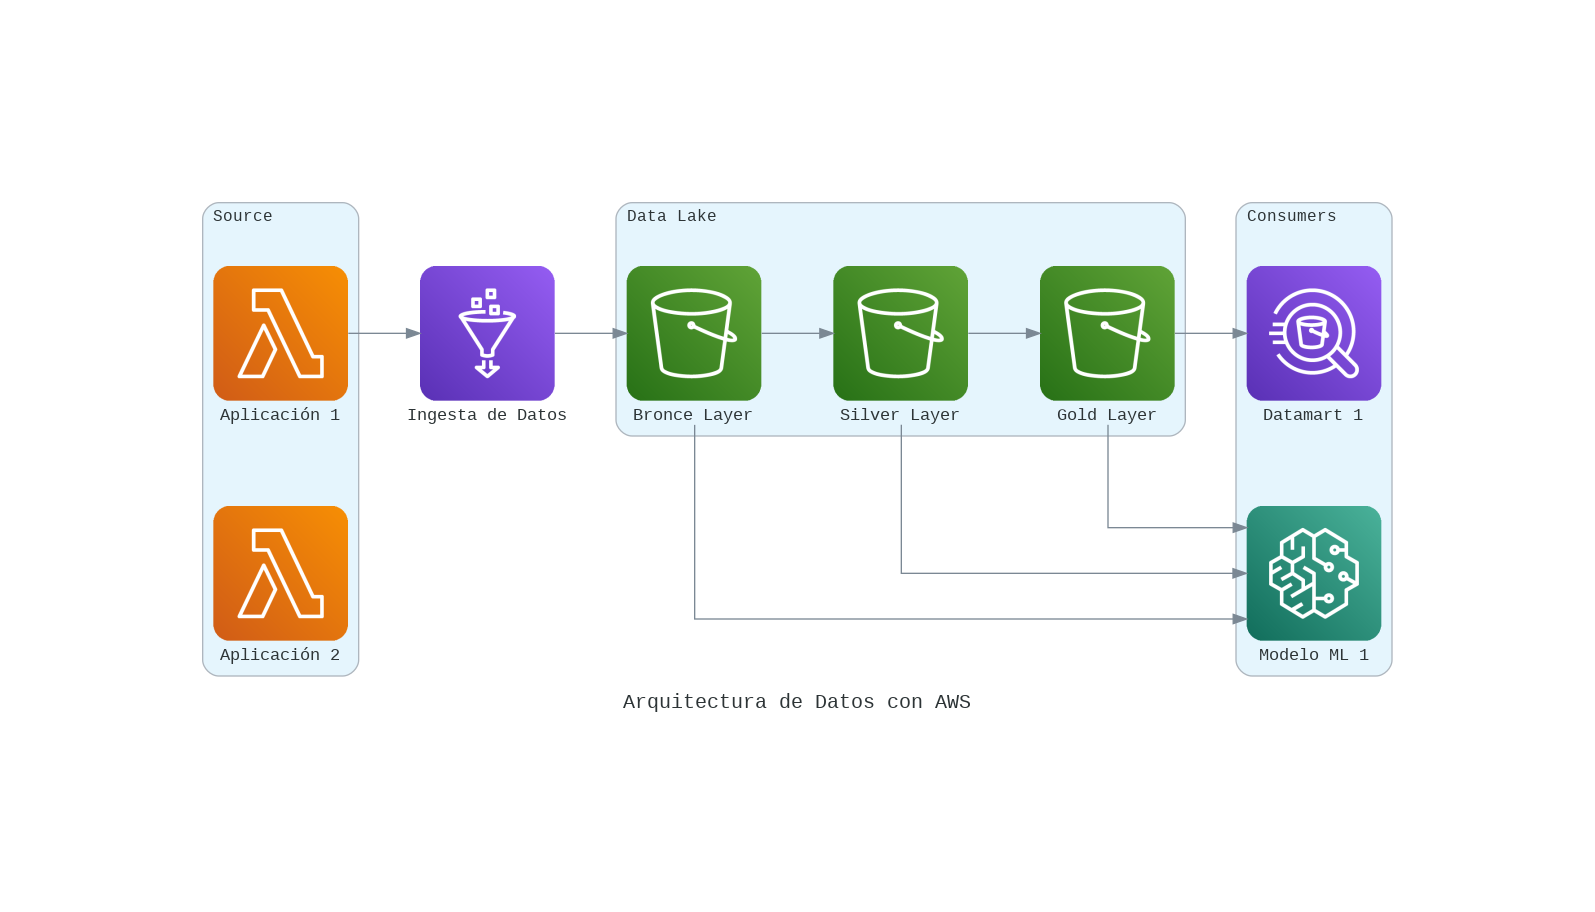

In [24]:
from diagrams import Cluster, Diagram
from diagrams.gcp.analytics import BigQuery, Dataflow, PubSub
from diagrams.gcp.compute import AppEngine, Functions
from diagrams.gcp.database import BigTable
from diagrams.gcp.iot import IotCore
from diagrams.gcp.storage import GCS

with Diagram("Message Collecting", show=False):
    pubsub = PubSub("pubsub")

    with Cluster("Source of Data"):
        [IotCore("core1"),
         IotCore("core2"),
         IotCore("core3")] >> pubsub

    with Cluster("Targets"):
        with Cluster("Data Flow"):
            flow = Dataflow("data flow")

        with Cluster("Data Lake"):
            flow >> [BigQuery("bq"),
                     GCS("storage")]

        with Cluster("Event Driven"):
            with Cluster("Processing"):
                flow >> AppEngine("engine") >> BigTable("bigtable")

            with Cluster("Serverless"):
                flow >> Functions("func") >> AppEngine("appengine")

    pubsub >> flow

diag